In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("/videogamesales.csv")
df.head()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05
1,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03
2,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01
3,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01
4,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01


In [9]:
df["Global_Sales_Calculated"] = (
    df["NA_Sales"] +
    df["EU_Sales"] +
    df["JP_Sales"] +
    df["Other_Sales"]
)
df_sorted = df.sort_values(by="Global_Sales_Calculated", ascending=False)
df_sorted.head()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales_Calculated
6109,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
122,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
8315,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
9743,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
705,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


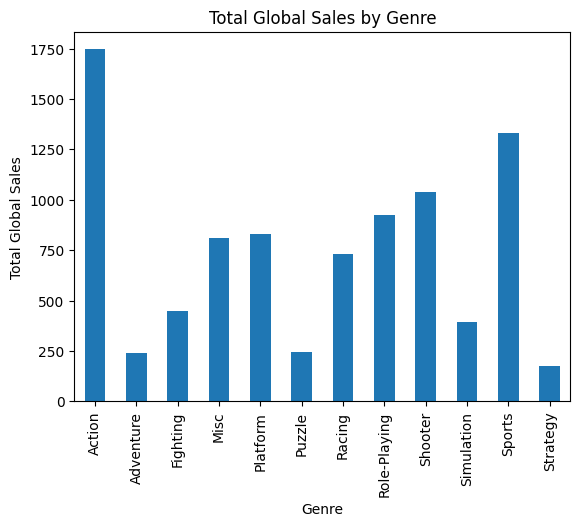

In [10]:
genre_sales = df.groupby("Genre")["Global_Sales_Calculated"].sum()

plt.figure()
genre_sales.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Total Global Sales")
plt.title("Total Global Sales by Genre")
plt.show()


In [11]:
gta_df = df[df["Name"].str.contains("Grand Theft Auto", case=False, na=False)]

gta_df_filtered = pd.DataFrame({
    "Name": gta_df["Name"],
    "Platform": gta_df["Platform"],
    "Year": gta_df["Year"],
    "EU_JP_Sales": gta_df["EU_Sales"] + gta_df["JP_Sales"]
})

gta_df_filtered


,Name,Platform,Year,EU_JP_Sales
999,Grand Theft Auto,PS,1997.0,1.39
1290,Grand Theft Auto 2,PS,1998.0,2.07
1469,"Grand Theft Auto: Mission Pack #1, London 1969",PS,1998.0,0.04
2323,Grand Theft Auto III,PS2,2001.0,4.81
2805,Grand Theft Auto: Vice City,PS2,2002.0,5.96
3563,Grand Theft Auto III,PC,2002.0,0.01
3639,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003.0,0.56
3688,Rockstar Games Double Pack: Grand Theft Auto I...,PS2,2003.0,0.66
4356,Grand Theft Auto: Vice City,PC,2003.0,0.03
4405,Grand Theft Auto: San Andreas,PS2,2004.0,0.81


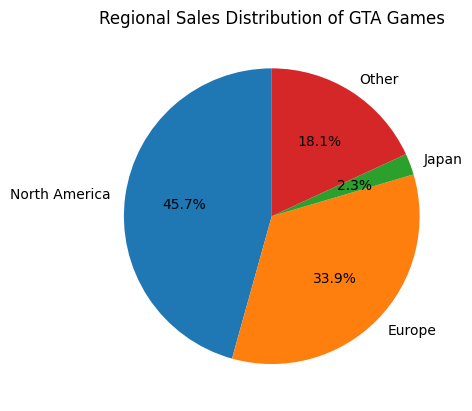

In [12]:
gta_region_sales = {
    "North America": gta_df["NA_Sales"].sum(),
    "Europe": gta_df["EU_Sales"].sum(),
    "Japan": gta_df["JP_Sales"].sum(),
    "Other": gta_df["Other_Sales"].sum()
}

plt.figure()
plt.pie(
    gta_region_sales.values(),
    labels=gta_region_sales.keys(),
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Regional Sales Distribution of GTA Games")
plt.show()
